# Creating occupancy/volume fraction profiles

One of the ways of graphically representing interfacial structure is via occupancy/volume fraction profile graphs. Here we will demonstrate how to do this in `refnx`, using a supported lipid bilayer as an example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from refnx.analysis import Parameter
from refnx.reflect import SLD, LipidLeaflet, create_occupancy

In [2]:
si = SLD(2.07)
d2o = SLD(6.36)
sio2 = SLD(3.47)

# these values are roughly correct for DMPC.

apm = Parameter(56, "area per molecule")
# the sum of scattering lengths for the lipid head and tail in Angstrom.
b_heads = Parameter(6.01e-4, "b_heads")
b_tails = Parameter(-2.92e-4, "b_tails")

# the volume occupied by the head and tail groups in cubic Angstrom.
v_heads = Parameter(319, "v_heads")
v_tails = Parameter(782, "v_tails")

# the head and tail group thicknesses.
inner_head_thickness = Parameter(9, "inner_head_thickness")
outer_head_thickness = Parameter(9, "outer_head_thickness")
tail_thickness = Parameter(14, "tail_thickness")

# finally construct a `LipidLeaflet` object for the inner and outer leaflets.
# Note that here the inner and outer leaflets use the same area per molecule,
# same tail thickness, etc, but this is not necessary if the inner and outer
# leaflets are different.
inner_leaflet = LipidLeaflet(
    apm, b_heads, v_heads, inner_head_thickness, b_tails, v_tails, tail_thickness, 3, 3
)
# we reverse the monolayer for the outer leaflet because the tail groups face upwards
outer_leaflet = LipidLeaflet(
    apm,
    b_heads,
    v_heads,
    outer_head_thickness,
    b_tails,
    v_tails,
    tail_thickness,
    3,
    3,
    reverse_monolayer=True,
)

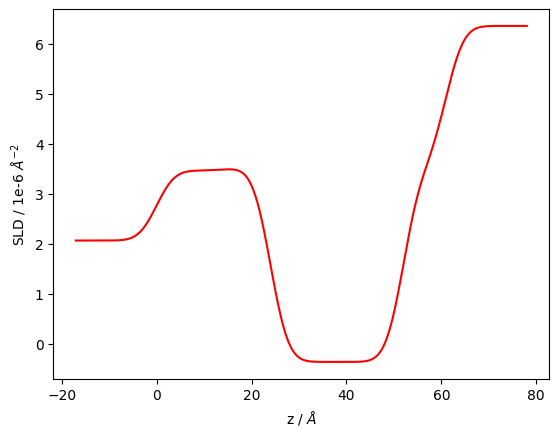

In [3]:
# create the structure and visualise the SLD.
s = si | sio2(15, 3) | inner_leaflet | outer_leaflet | d2o(0, 3)

s.plot();

This SLD plot is fine, but now we want to see the occupancy/volume fraction profile

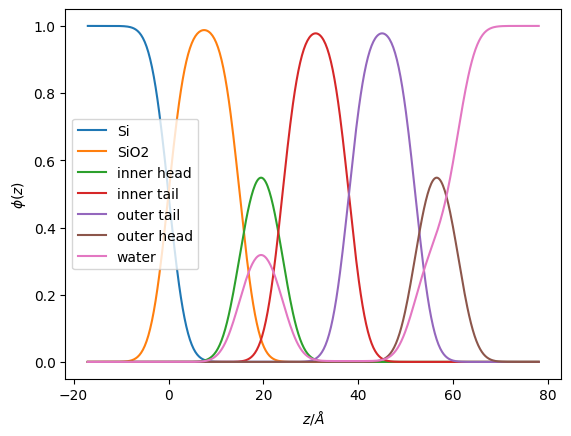

In [4]:
z, vfps = create_occupancy(s)

labels = ["Si", "SiO2", "inner head", "inner tail", "outer tail", "outer head", "water"]

for vfp, label in zip(vfps, labels):
    plt.plot(z, vfp, label=label)

plt.legend()
plt.ylabel("$\\phi(z)$")
plt.xlabel("$z/ \\AA$");

This looks a bit clumpy, perhaps we want to plot the tails together and the head regions together, to simplify the plot. Unfortunately this has to be done manually at the moment. Here we specify which occupancy profiles we want to group together. The head groups are in `vfps[2]` and in `vfps[5]`, and the tails are in `vfps[3]`, `vfps[4]`. This example is relatively straightforward. It might be more difficult if your `Structure` or `Component`s have more complexity.

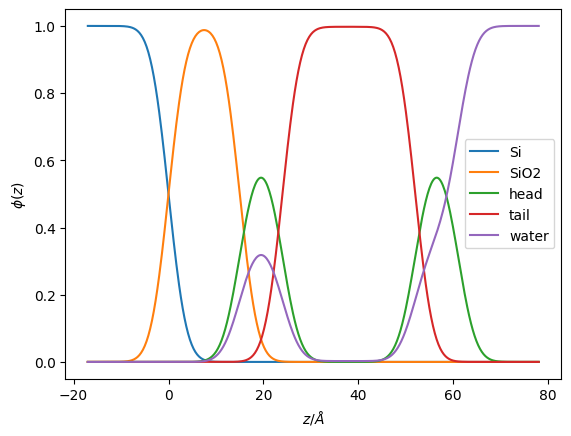

In [5]:
groups = [(0,), (1,), (2, 5), (3, 4), (6,)]
labels = ["Si", "SiO2", "head", "tail", "water"]

for g, label in zip(groups, labels):
    vfp = np.take(
        vfps, g, axis=0
    )  # the take function is used to extract indices from a numpy array.
    if len(vfp.shape) > 1:
        vfp = np.sum(vfp, axis=0)
    plt.plot(z, vfp, label=label)

plt.legend()
plt.ylabel("$\\phi(z)$")
plt.xlabel("$z/ \\AA$");